# Ch 10 Perron-Frobenius

In [17]:
# numerical and scientific computing libraries
import numpy as np
import scipy as sp

# plotting libraries
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
# for pretty printing
np.set_printoptions(4, linewidth=100, suppress=True)

In [19]:
# create a random stochastic matrix with size n.
def random_stochastic_matrix(n):
    A = np.random.rand(n, n)
    A = A / np.sum(A, axis=1)[:, None]
    return A

In [20]:
n = 5
n_repeats = 1000

# set a list of complex numbers to be used as eigenvalues
eigenvalues_list = np.zeros((n_repeats, n), dtype=complex)

for r in range(n_repeats):
    # create a random stochastic matrix
    A = random_stochastic_matrix(n)

    # extract eigenvalues and eigenvectors.
    eigenvalues, eigenvectors = sp.linalg.eig(A)
    
    # store the eigenvalues.
    eigenvalues_list[r, :] = eigenvalues

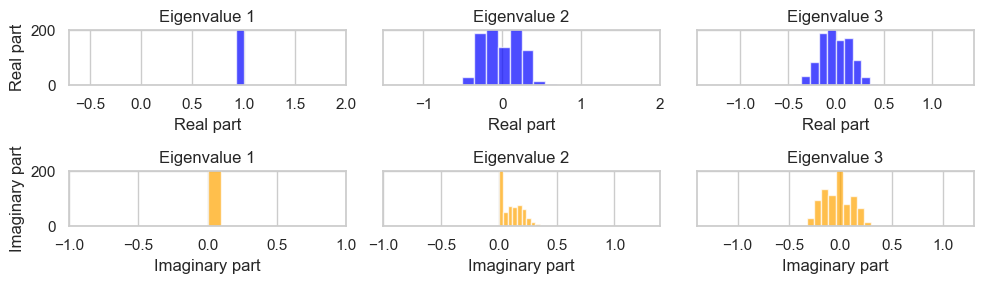

In [21]:
# plot the histograms of the first, second and third eigenvalues.
# for each eigenvalue, plot both the real and imaginary parts in separate histograms.
# make sure they look nice and are easy to read.
k = 3

eigenvalues_topk = eigenvalues_list[:, :k]

real_parts = np.real(eigenvalues_topk)
imaginary_parts = np.imag(eigenvalues_topk)

sns.set(style="whitegrid")
fig, axs = plt.subplots(2, k, figsize=(10, 3), sharey=True)
axs[0, 0].set_ylabel("Real part")
axs[1, 0].set_ylabel("Imaginary part")
for i in range(k):
    axs[0, i].hist(real_parts[:,i], color="blue", alpha=0.7)
    axs[1, i].hist(imaginary_parts[:,i], color="orange", alpha=0.7)
    axs[0, i].set_title(f"Eigenvalue {i + 1}")
    axs[1, i].set_title(f"Eigenvalue {i + 1}")
    axs[0, i].set_xlabel("Real part")
    axs[1, i].set_xlabel("Imaginary part")
    axs[0, i].set_xlim([np.min(real_parts[:,i])-1, np.max(real_parts[:,i])+1])
    axs[1, i].set_xlim([np.min(imaginary_parts[:,i])-1, np.max(imaginary_parts[:,i])+1])
    axs[0, i].set_ylim([0, 200])
    axs[1, i].set_ylim([0, 200])
    axs[0, i].grid(True)
    axs[1, i].grid(True)
plt.tight_layout()
plt.show()

In [23]:
n_iter = 10

leading_eigenvector = np.real(eigenvectors[:, 0])
new_vector = leading_eigenvector / np.linalg.norm(leading_eigenvector)

random_vector = np.random.randn(n)
random_vector = random_vector / np.linalg.norm(random_vector)
new_random_vector = random_vector

distances = []
distances_random = []

for i in range(n_iter):
    new_vector = np.dot(A, new_vector)
    new_vector = new_vector / np.linalg.norm(new_vector)

    new_random_vector = np.dot(A, new_random_vector)
    new_random_vector = new_random_vector / np.linalg.norm(new_random_vector)

    distances.append(np.linalg.norm(new_vector - leading_eigenvector))
    distances_random.append(np.linalg.norm(new_random_vector - leading_eigenvector))

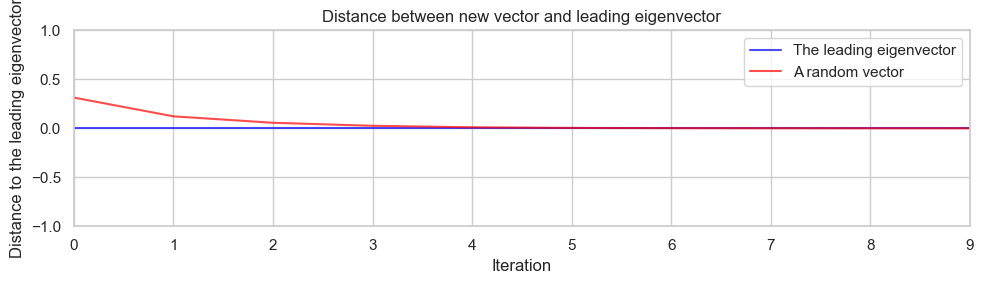

In [24]:
# plot distances in a pretty format.
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(10, 3))
ax.plot(distances, color="blue", alpha=0.7)
ax.plot(distances_random, color="red", alpha=0.7)
ax.set_title("Distance between new vector and leading eigenvector")
ax.set_xlabel("Iteration")
ax.set_ylabel("Distance to the leading eigenvector")
ax.set_xlim([0, n_iter-1])
ax.set_ylim([-1, 1])
ax.grid(True)
ax.legend(["The leading eigenvector", "A random vector"])
plt.tight_layout()
plt.show()